# **CARGA DE TRAIN Y TEST**

In [9]:
import numpy as np
import pandas as pd

In [10]:
x_train=pd.read_excel('01-x_train-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('01-x_test-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('01-y_train-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('01-y_test-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [11]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [12]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [13]:
overs = RandomOverSampler()

In [14]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [15]:
y_t_overs

,Emociones
0,2
1,2
2,2
3,3
4,0
...,...
3439,3
3440,3
3441,3
3442,3


# **NORMALIZACION DE CARACTERISTICAS**

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [17]:
x_train_std

array([[ 0.30724703,  0.67233118, -1.26088748, ...,  0.86060053,
         0.32167969,  1.04221066],
       [-0.43428856, -0.89202434,  0.79532776, ..., -0.11744891,
        -1.26749806,  0.08934367],
       [-0.19761045, -0.06743751, -0.00608142, ...,  0.6895268 ,
        -2.36371773,  0.87774065],
       ...,
       [-0.76502483, -0.26977802,  0.80706184, ..., -0.05256849,
         2.71980082, -1.12829647],
       [-0.77709726, -0.53428209,  0.72007433, ..., -0.36481272,
         1.17892665, -0.37395214],
       [-0.6232915 , -2.25998192,  1.92077182, ..., -1.94880127,
         0.24923807,  0.20681066]])

In [18]:
y_t_overs

,Emociones
0,2
1,2
2,2
3,3
4,0
...,...
3439,3
3440,3
3441,3
3442,3


# **MODELO DE MARCHINE LEARNING**

In [19]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11776     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [20]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
108/108 [==============================] - 1s 2ms/step - loss: 0.9522 - accuracy: 0.5915
Epoch 2/800
108/108 [==============================] - 0s 2ms/step - loss: 0.8083 - accuracy: 0.6641
Epoch 3/800
108/108 [==============================] - 0s 2ms/step - loss: 0.7257 - accuracy: 0.7006
Epoch 4/800
108/108 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7308
Epoch 5/800
108/108 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7671
Epoch 6/800
108/108 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7843
Epoch 7/800
108/108 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.8034
Epoch 8/800
108/108 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.8368
Epoch 9/800
108/108 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8513
Epoch 10/800
108/108 [==============================] - 0s 2ms/step - loss: 0.3411 - accura

array([0, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 3, 2, 3, 0, 3, 3, 0, 3, 1, 2, 1,
       2, 3, 3, 0, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 0, 3, 1,
       1, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       1, 3, 2, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 3, 2, 3, 2, 0, 2, 3, 2,
       3, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 3,
       1, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 3, 0, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 1, 3, 2, 3, 0, 2, 3, 1, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 1, 1, 1, 0, 0, 0, 3, 2, 0, 0, 3, 3, 3, 0, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 0, 3, 2, 1, 1, 3, 2, 2, 2, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2,
       0, 1, 3, 3, 3, 2, 1, 2, 2, 3, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 3, 2, 2, 3, 0, 0, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 2, 3, 2, 0, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2,
       0, 2, 3, 3, 2, 2, 2, 2, 0, 3, 3, 2, 2, 2, 3,

# **EVALUACION**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        53
           1       0.33      0.30      0.32        56
           2       0.71      0.65      0.68       238
           3       0.61      0.71      0.66       109

    accuracy                           0.62       456
   macro avg       0.55      0.57      0.56       456
weighted avg       0.62      0.62      0.62       456



In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        53
           1       0.33      0.30      0.32        56
           2       0.71      0.65      0.68       238
           3       0.61      0.71      0.66       109

    accuracy                           0.62       456
   macro avg       0.55      0.57      0.56       456
weighted avg       0.62      0.62      0.62       456

Matriz de confusión, sin normalización
[[ 34   3  13   3]
 [ 10  17  22   7]
 [ 17  28 154  39]
 [  0   3  29  77]]


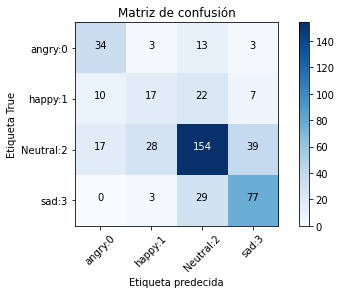

In [23]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')